In [2]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
env = gym.make('FrozenLake-v0')

[2017-05-14 16:36:32,647] Making new env: FrozenLake-v0


In [4]:
env.action_space

Discrete(4)

In [5]:
env.observation_space

Discrete(16)

In [6]:
# the q-network approach

tf.reset_default_graph()

In [7]:
# feed forward part to choose actions

inputs1 = tf.placeholder(shape=[1,16], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1, W)
predict = tf.argmax(Qout, 1)

In [8]:
# find loss between target and predicted Q values

nextQ = tf.placeholder(shape=[1,4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [9]:
init = tf.global_variables_initializer()

In [10]:
y = 0.99 #discount ratefor rewards
e = 0.1
num_episodes = 2000

# list to contain total rewards and steps per episode
jList = []
rList = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_episodes):
        # reset env
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        # the q-network
        while j<99:
            j += 1
            a, allQ = sess.run([predict, Qout], feed_dict={inputs1:np.identity(16)[s:s+1]})
            
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            
            #get new state, reward
            s1, r, d, _ = env.step(a[0])
            
            # get Q values for new state
            Q1 = sess.run(Qout, feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            
            #obtain maxQ1 and set as target
            maxQ1 = np.max(Q1)
            
            targetQ = allQ
            
            targetQ[0,a[0]] = r + y*maxQ1
            
            sess.run(updateModel, feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            
            rAll += r
            s = s1
            if d == True:
                # reduce chance of random action
                e = 1./((i+50)+10)
                break
        jList.append(j)
        rList.append(rAll)

print("Successful episodes", str(sum(rList)/num_episodes))

Successful episodes 0.0


In [12]:
np.identity(16)[1:2]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]])

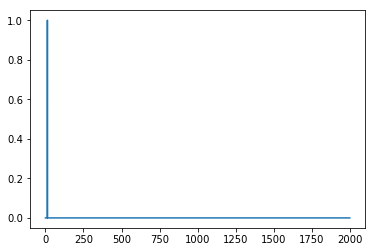

In [20]:
plt.plot(rList)

In [11]:
tf.version

AttributeError: module 'tensorflow' has no attribute 'version'

In [12]:
tf.__version__


'1.0.1'

In [13]:
gym.__version__

'0.8.1'